#  Принятие решений в бизнесе.

**Заказчик**: крупный интернет-магазин. 

**Цель исследования**:  
Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

**Ход исследования** : 
- приоритизация гипотез, подготовленных вместе с отделом маркетинга для увеличения выручки
- анализ полученных результатов в ходе A/B теста.

**Входные данные и их описание** :
1. 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

Таблица **/datasets/hypothesis.csv** :

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

2. результаты A/B тестирования, представленные в таблицах: 

**/datasets/orders.csv.**:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**/datasets/visitors.csv.**:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
# импорт библиотек, необходимых для работы над проектом
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Приоритизация гипотез.

In [2]:
# чтение файла с гипотезами

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 130 
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# переименование столбцов в таблице hypothesis
# hypothesis = hypothesis.rename(columns = str.lower)
hypothesis.columns = hypothesis.columns.str.lower()

### ICE 

In [4]:
# вычисление параметра ICE для каждой из гипотез
hypothesis['ICE']= (hypothesis.impact*hypothesis.confidence)/hypothesis.efforts
pd.options.display.max_colwidth = 130 
hypothesis.sort_values(by = 'ICE',ascending= False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### RICE 

In [5]:
# вычисление параметра RICE для каждой из гипотез
hypothesis['RICE']= (hypothesis.reach*hypothesis.impact*hypothesis.confidence)/hypothesis.efforts
pd.options.display.max_colwidth = 130 
hypothesis.sort_values(by = 'RICE',ascending= False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [6]:
# применение фреймворков 'ICE' и 'RICE'
(hypothesis[['hypothesis','ICE','RICE']]
                                        .sort_values(by = ['ICE','RICE'],ascending= False)
                                        .style.background_gradient(cmap='Blues', axis=0))

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


### Вывод:
Как видно из графика выше, наиболее перспективными гипотезами по параметру ICE оказались гипотезы 1, 8 и 9. 

По RICE же, самой перспективной гипотезой оказалась гипотеза № 8. Так получилось, потому что параметр reach по данной гипотезе равен 10, что означает что изменение затронет всех пользователей. Гипотезы 1, 3 и 7, по RICE, кажутся также достаточно перспективными.

## Подготовка к анализу A/B-теста

### Данные о заказах (orders).

In [7]:
# чтение файла с данными о заказах и сохранение в переменную orders
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# общая информация о таблице orders
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


Изменим тип данных в столбце с датой на datetime.

In [9]:
# изменения типа данных в столбце с датой
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

Посмотрим даты проведения теста.

In [10]:
# определение max и min даты привлечения
print('Минимальная дата привлечения:',orders['date'].min(),
      '\nМаксимальная дата привлечения',orders['date'].max())

Минимальная дата привлечения: 2019-08-01 00:00:00 
Максимальная дата привлечения 2019-08-31 00:00:00


Создание таблиц с количеством заказов и суммарной выручкой в выбранную дату в группе A и В.

In [11]:
# таблица с количеством заказов и суммарной выручкой в выбранную дату в группе A
orders_A_Daily = (
    orders.query('group == "A"')[['date','transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_A_Daily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [12]:
# таблица с количеством заказов и суммарной выручкой в выбранную дату в группе В
orders_B_Daily = (
    orders.query('group == "B"')[['date','transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
orders_B_Daily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Создание таблиц с ***кумулятивным*** количеством заказов и кумулятивной выручкой по дням в группе А и В.

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

orders_A_Cummulative = orders_A_Daily.apply(
    lambda x: orders_A_Daily[orders_A_Daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_A_Cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
orders_B_Cummulative = orders_B_Daily.apply(
    lambda x: orders_B_Daily[orders_B_Daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_B_Cummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

### Данные о визитах (visitors).

In [15]:
# чтение файла с данными о песещениях и сохранение в переменную visitors
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
# общая информация о таблице visitors
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [17]:
# изменения типа данных в столбце с датой
visitors['date'] = pd.to_datetime(visitors['date'],format = '%Y-%m-%d')

In [18]:
# определение max и min даты привлечения
print('Минимальная дата привлечения:',visitors['date'].min(),
      '\nМаксимальная дата привлечения',visitors['date'].max())

Минимальная дата привлечения: 2019-08-01 00:00:00 
Максимальная дата привлечения 2019-08-31 00:00:00


Даты проведения теста совпадают в обеих представленных таблицах.

Определим количество пользователей за каждый день теста в группах А и В.

In [19]:
# количество пользователей в выбранную дату в группе A;
visitorsADaily = visitors.query('group=="A"')[['date','visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [20]:
# количество пользователей в выбранную дату в группе B;
visitorsBDaily = visitors.query('group=="B"')[['date','visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Создадим таблицу с кумулятивным количеством пользователей по дням в группе А и В.

In [21]:
# датафрейм с кумулятивным количеством пользователей по дням в группе А
visitors_A_Cummulative = visitors.query('group == "A"').apply(
    lambda x: visitors[visitors['date'] <= x['date']].agg(
        {'date': 'max', 'visitors': 'sum'}
    ),
    axis=1,
)
visitors_A_Cummulative.columns = ['date', 'visitorsCummulativeA']

In [22]:
# датафрейм с кумулятивным количеством пользователей по дням в группе B
visitors_B_Cummulative = visitors.query('group == "B"').apply(
    lambda x: visitors[visitors['date'] <= x['date']].agg(
        {'date': 'max', 'visitors': 'sum'}
    ),
    axis=1,
)
visitors_B_Cummulative.columns = ['date', 'visitorsCummulativeB']

### Объединение таблиц в одну ( data ).

In [23]:
# обьединение полученных данных в одну таблицу data
data = (
    orders_A_Daily.merge(
        orders_B_Daily, on='date', how='left'
    )
    .merge(orders_A_Cummulative, on='date', how='left')
    .merge(orders_B_Cummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitors_A_Cummulative, on='date', how='left')
    .merge(visitors_B_Cummulative, on='date',  how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,1432,1432
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,2632,2632
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,3648,3648
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,5135,5135
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,6598,6598


Обозначим названия столбцов в таблице data:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.


## Анализ A/B-теста. 

### Рассчет статистической значимости различий в группах по 'сырым' данным

In [24]:
# таблицы с количеством заказов на каждого пользователя в каждой группе
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [25]:
# переменные, в которых пользователям из разных групп будет соответствовать количество заказов, 
# а тем, кто ничего не заказал, будут соответствовать нули

sampleA = (ordersByUsersA['orders'] 
           .append(pd.Series([0] * (data['visitorsPerDateA'].sum() - ordersByUsersA.shape[0]), 
                             name = 'orders'))) # нули для пользователей, которые ничего не заказывали

sampleB = (ordersByUsersB['orders'] 
           .append(pd.Series([0] * (data['visitorsPerDateB'].sum() - ordersByUsersB.shape[0]), 
                             name = 'orders'))) # нули для пользователей, которые ничего не заказывали

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть. За alpha - критический уровень статистической значимости примем значение 0.05.

In [26]:
# рассчет статистической значимости различий конверсии в группах
print('MW-test', 'pvalue = ', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B =',
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

MW-test pvalue =  0.017
Относительный прирост конверсии группы B = 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет,  отвергаем. Относительный выигрыш группы B равен 13.8% .

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [27]:
# рассчет статистической значимости различий в среднем чеке
print('MW-test', 'pvalue = ','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B =',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

MW-test pvalue =  0.729
Относительный прирост среднего чека группы B = 0.259


P-value значительно больше 0.05. Значит отвергнуть нулевую гипотезу и сделать вывод о различии в среднем чеке нельзя. Однако, прирост среднего чека группы B относительно среднего чека группы A составил 26% .

### Стабильность кумулятивных метрик. 

#### График кумулятивной выручки по группам. 

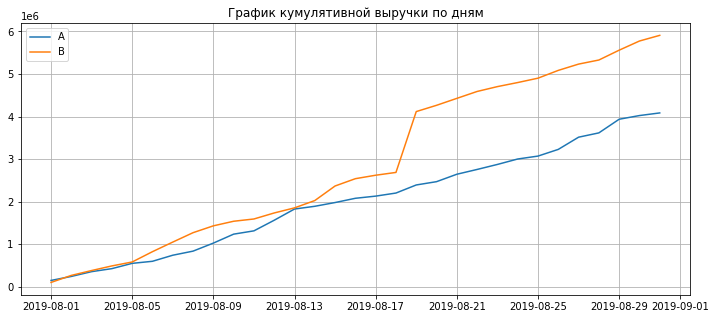

In [28]:
plt.figure(figsize = (12,5)) 
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='B')

plt.legend()
plt.grid()
plt.title('График кумулятивной выручки по дням')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.

Также, судя по графику, группа А стабильно хуже по накопленным показателям, чем группа В. 

Видно, что в первой половине теста выручка росла достаточно равномерно в обеих группах. Однако график выручки группы В в определенной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

####  График кумулятивного среднего чека по группам. 

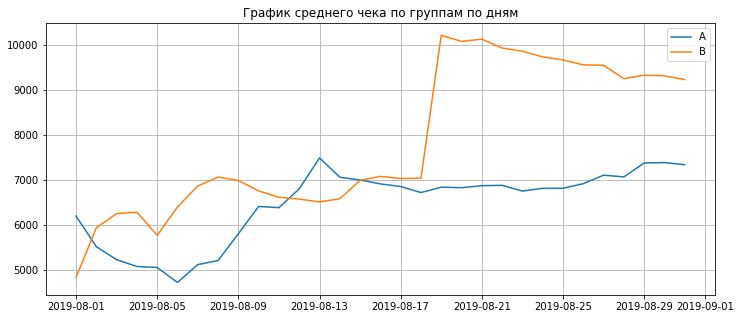

In [29]:
# построение графика кумулятивного среднего чека по группам
plt.figure(figsize = (12,5)) 
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

plt.legend()
plt.grid()
plt.title('График среднего чека по группам по дням')
plt.show()

Обе группы также показывают рост. И, судя по графику, большую часть времени средний чек группы В был выше среднего чека группы А. 

Однако, также виден резкий всплеск на графике группы В. Возможно, в группу B во второй половине теста попали крупные заказы. 

График группы А также довольно стремительно рос до середины теста, и далее установился примерно на одном уровне. 

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

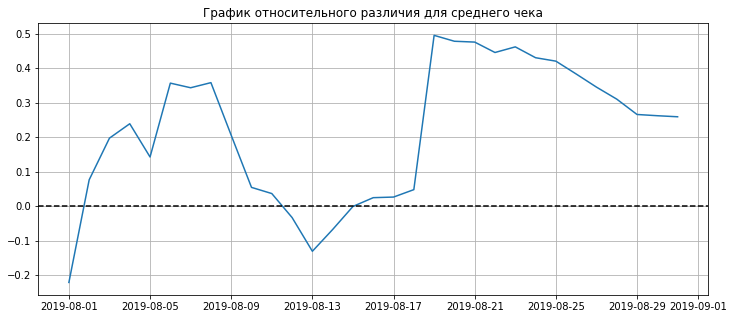

In [30]:
plt.figure(figsize = (12,5)) 
# cтроим отношение средних чеков
(plt.plot(data['date'],
          (data['revenueCummulativeB']/data['ordersCummulativeB'])/
          (data['revenueCummulativeA']/data['ordersCummulativeA'])-1))

plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного различия для среднего чека')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы и выбросы График различия среднего чека говорит о том, что результаты группы B не стабильны, но большую часть времени все же выше среднего чека группы А. Под конец теста разница оказалась выше 20%.


#### График кумулятивной конверсии по группам.

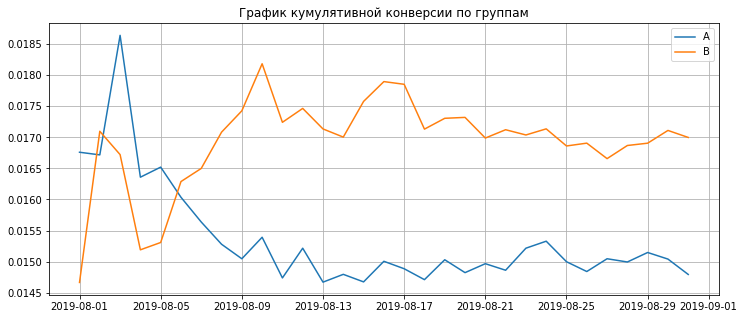

In [31]:
# строим графики кумулятивную конверсию
plt.figure(figsize = (12,5))

plt.plot(data['date'], (data['ordersCummulativeA']/data['visitorsCummulativeA']), label='A')
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB']), label='B')

plt.legend()
plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.show()

Изначально,кумулятивная конверсия группы В была ниже, чем в группе А. Однако, затем она вырвалась вперёд и зафиксировалась, а конверсия же группы А просела и также зафиксировалась.

#### График относительного изменения кумулятивной конверсии группы B к группе A.

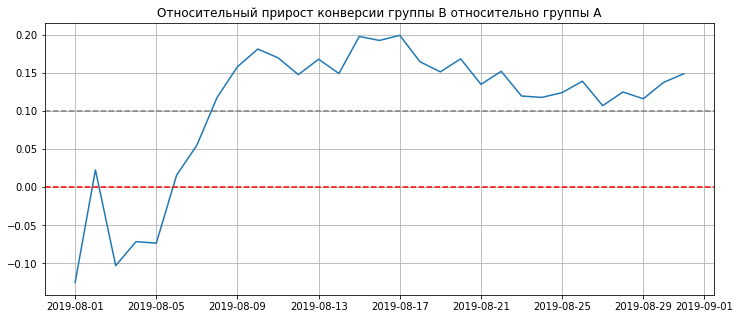

In [32]:
# график относительного изменения кумулятивной конверсии 

plt.figure(figsize = (12,5)) 
(plt.plot(data['date'],
          (data['ordersCummulativeB']/data['visitorsCummulativeB'])/
          (data['ordersCummulativeA']/data['visitorsCummulativeA'])-1))


plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.grid()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

В начале теста группа B проигрывала группе A, однако затем вырвалась вперёд и держится стабильно выше.
В целом отношение конверсии выглядит стабильным, и предварительно можно сказать что конверсия группы В выше группы А примерно на 10% . Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 


### Анализ выбросов и всплесков

#### График количества заказов по пользователям. 

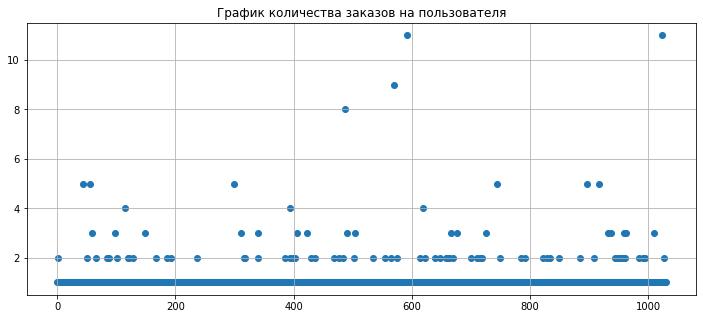

In [33]:
# таблица с количеством закозов на каждого покупателя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']


# построение графика количества заказов по пользователям
plt.figure(figsize = (12,5)) 
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.title('График количества заказов на пользователя')
plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна.

Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.

Посчитаем выборочные перцентили количества заказов на одного пользователя, чтобы понять какое количество заказов считать аномальным. 

In [34]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали 4 и более раз.
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### График стоимостей заказов. 

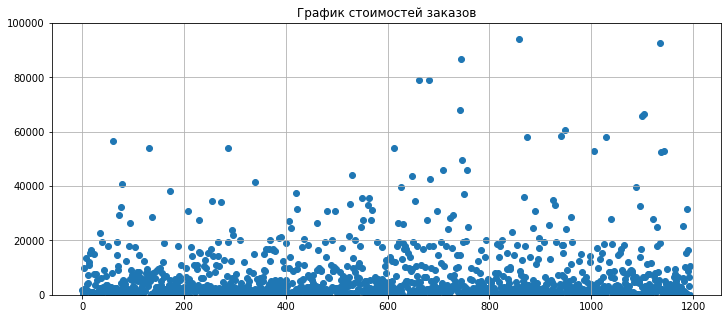

In [35]:
# построение точечного графика стоимостей заказов
plt.figure(figsize = (12,5)) 
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0,100000)
plt.grid()
plt.title('График стоимостей заказов')
plt.show()

Судя по графику, большая часть заказов стоимостью до 40 тысяч. Как и предполагалось, есть небольшое количество дорогих заказов. Определим более точные границы. 

In [36]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 40 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [37]:
# вычисление количества аномальных пользователей
usersWithManyOrders = ordersByUsers.query('orders > 2')['visitorId']
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']

abnormalUsers = (usersWithManyOrders.append(usersWithExpensiveOrders)
    .drop_duplicates())

print(abnormalUsers.shape) 

(55,)


Всего 55 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [38]:
# выборки количества заказов по пользователям по группам теста
sampleAFiltered = (ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders']
        .append(pd.Series([0] * (data['visitorsPerDateA'].sum() - ordersByUsersA.shape[0]), 
                             name = 'orders')))

sampleBFiltered = (ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders']
        .append(pd.Series([0] * (data['visitorsPerDateB'].sum() - ordersByUsersB.shape[0]), 
                             name = 'orders')))

### Рассчет статистической значимости различий в группах по 'очищенным' данным

In [39]:
# рассчет статистической значимости различий конверсии в группах по 'очищенным' данным
print('MW-test', 'pvalue = ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('T-test', 'pvalue = ', "{0:.3f}".format(stats.ttest_ind(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в конверсии группы В к группе А=','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

MW-test pvalue =  0.006
T-test pvalue =  0.006
Относительное различие в конверсии группы В к группе А= 0.190


Р-value снова оказался меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, снова отвергаем. Прирост конверсии группы В, относительно группы А увеличился до 19%.

In [40]:
# рассчет статистической значимости различий среднего чека в группах по 'очищенным' данным

print('MW-test', 'pvalue = ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )]['revenue'])[1]))

print('Относительное различие в среднем чеке группы В к группе А=',
    "{0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
        ['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
        ['revenue'].mean() - 1))

MW-test pvalue =  0.916
Относительное различие в среднем чеке группы В к группе А= 0.058


Статистически значимых различий по среднему чеку не выявлено.
P-value увеличился, но и разница между сегментами сократилась с 26% до 6%.

## Вывод

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимых различий по среднему чеку между группами до и после удаления аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется, что позволило найти аномалии.

Группа B статистически значимо лучше  группы A по конверсии, также график конверсии говорит о фиксации результата. Однако, в ходе теста не выявилось значимых различий по среднему чеку. График же показывает преимущество группы В.